In [1]:
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import TensorDataset, DataLoader

from catalyst import utils

sns.set(style="darkgrid", font_scale=1.4)

%config InlineBackend.figure_format = 'retina'

### Make Moons dataset

In [2]:
X, y = make_moons(n_samples=10000, random_state=42, noise=0.07)
# X, y = make_circles(n_samples=10000, random_state=42, noise=0.02)

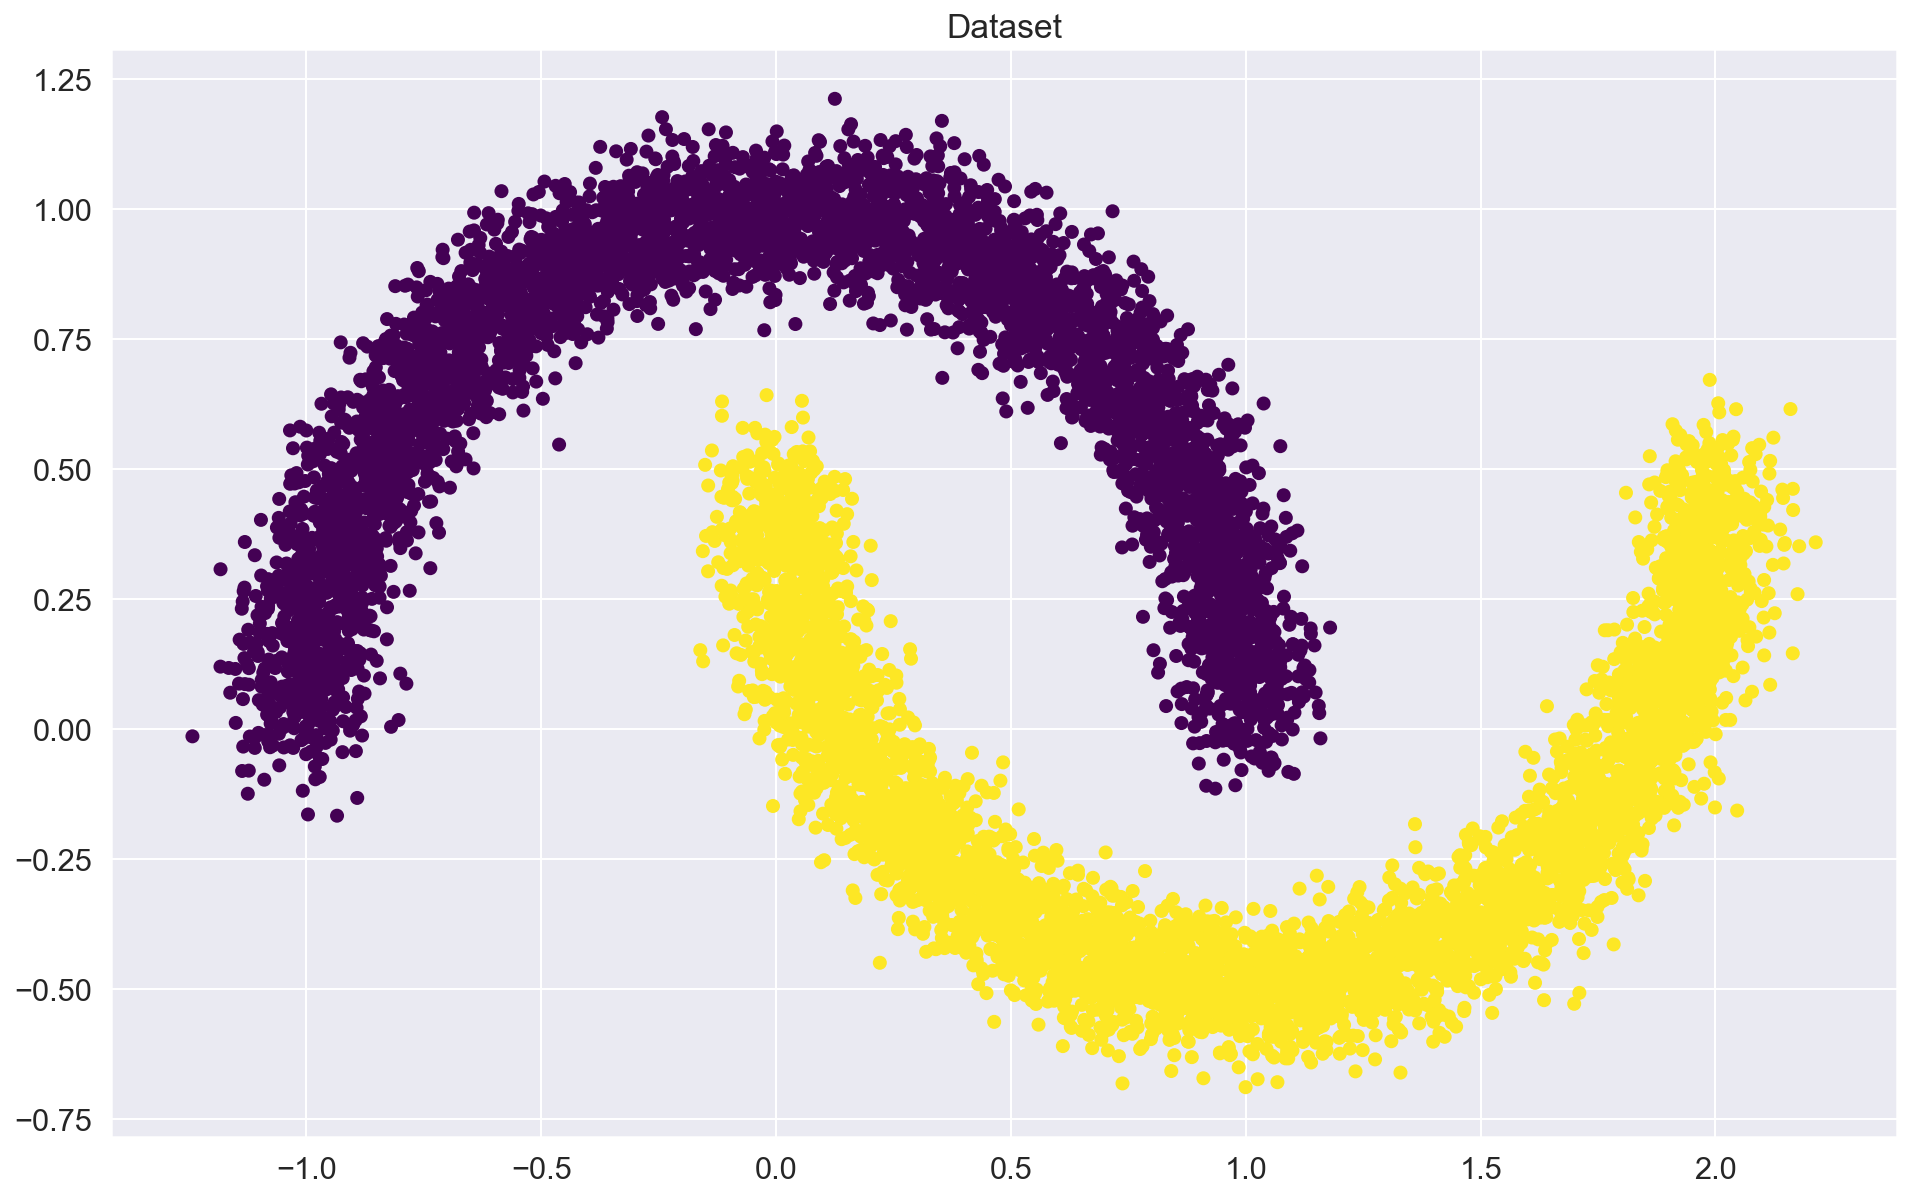

In [3]:
plt.figure(figsize=(16, 10))
plt.title("Dataset")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.show()

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [5]:
X_train_t = torch.from_numpy(X_train).to(torch.float32)  # YOUR CODE GOES HERE
y_train_t = torch.from_numpy(y_train).to(torch.float32) # YOUR CODE GOES HERE
X_val_t = torch.from_numpy(X_val).to(torch.float32)  # YOUR CODE GOES HERE
y_val_t = torch.from_numpy(y_val).to(torch.float32) # YOUR CODE GOES HERE

In [6]:
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
train_dataloader = DataLoader(train_dataset, batch_size=128)
val_dataloader = DataLoader(val_dataset, batch_size=128)

## Linear

### NN try 1

In [7]:
model = nn.Sequential(
    nn.Linear(2, 30),
    nn.ReLU(),
    nn.Linear(30, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [8]:
tol = 1e-3
losses = []
max_epochs = 80
# prev_weights = torch.zeros_like(linear_regression.weights)
stop_it = False
for epoch in range(max_epochs):
    utils.set_global_seed(42 + epoch)
    for it, (X_batch, y_batch) in enumerate(train_dataloader):
        optimizer.zero_grad()
#         outp = model(X_batch)
        outp = model(X_batch)  # YOUR CODE GOES HERE
        loss = loss_function(outp.flatten(), y_batch)  # YOUR CODE GOES HERE
        loss.backward()
        losses.append(loss.detach().flatten()[0])
        optimizer.step()
        probabilities = torch.sigmoid(outp) # YOUR CODE GOES HERE
        preds = (probabilities>0.5).type(torch.long)
#         batch_acc = (preds.flatten() == y_batch).type(torch.float32).sum()/y_batch.size(0)
#         if it % 500000 == 0:
#             print(f"Iteration: {it + epoch*len(train_dataset)}\nBatch accuracy: {batch_acc}")
#         current_weights = linear_regression.weights.detach().clone()
#         if (prev_weights - current_weights).abs().max() < tol:
#             print(f"\nIteration: {it + epoch*len(train_dataset)}.Convergence. Stopping iterations.")
#             stop_it = True
#             break
#         prev_weights = current_weights
    if stop_it:
        break

### Results

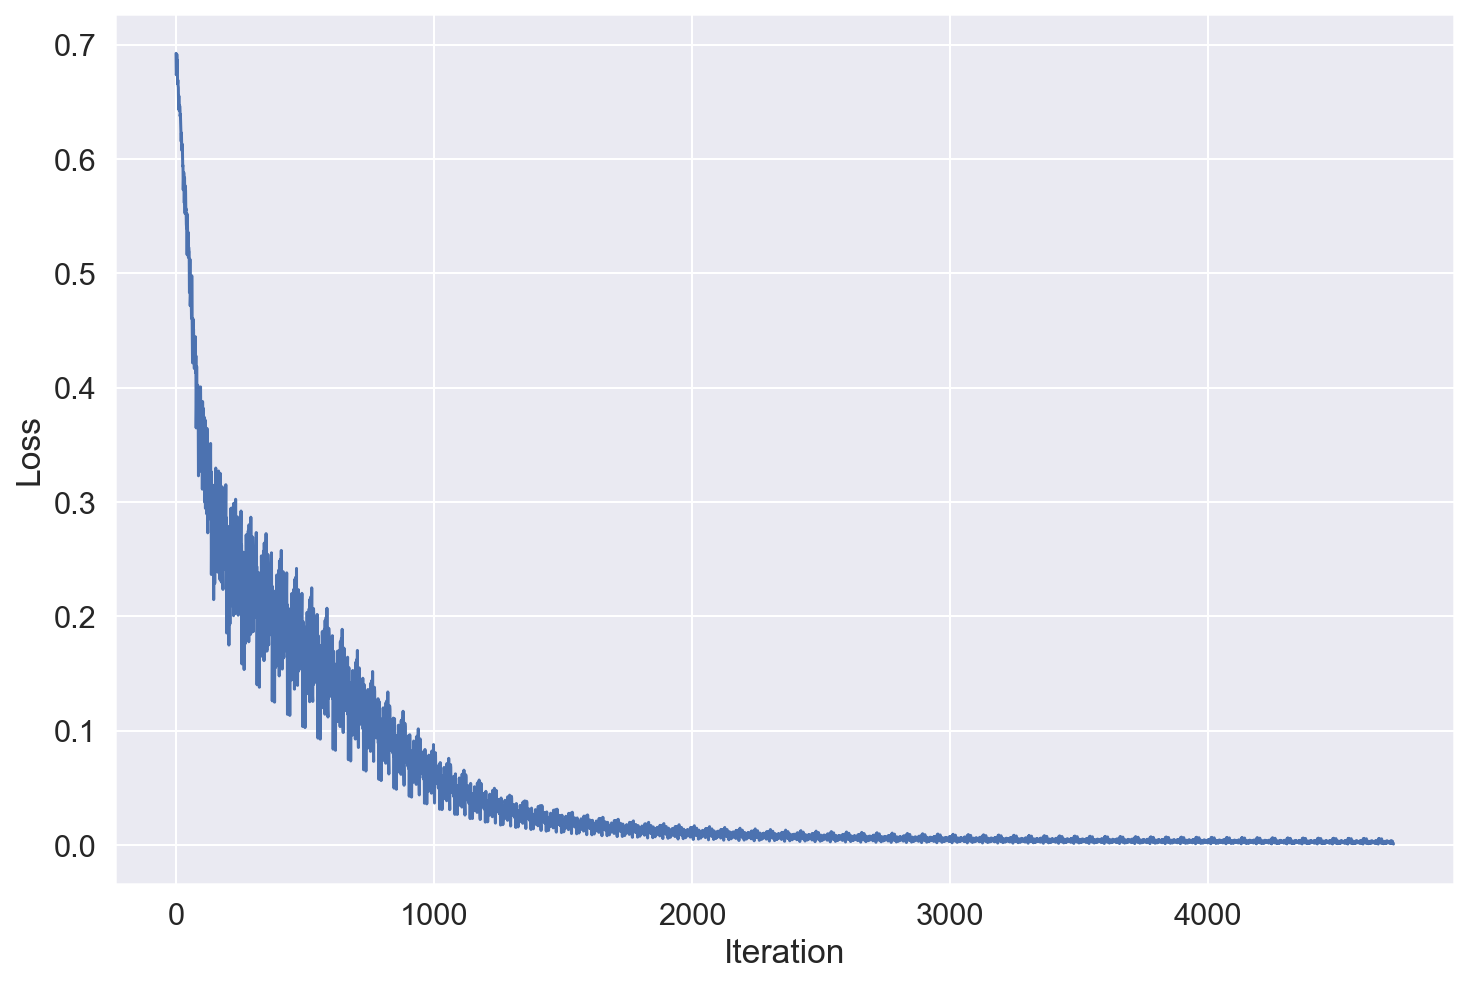

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(losses)), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

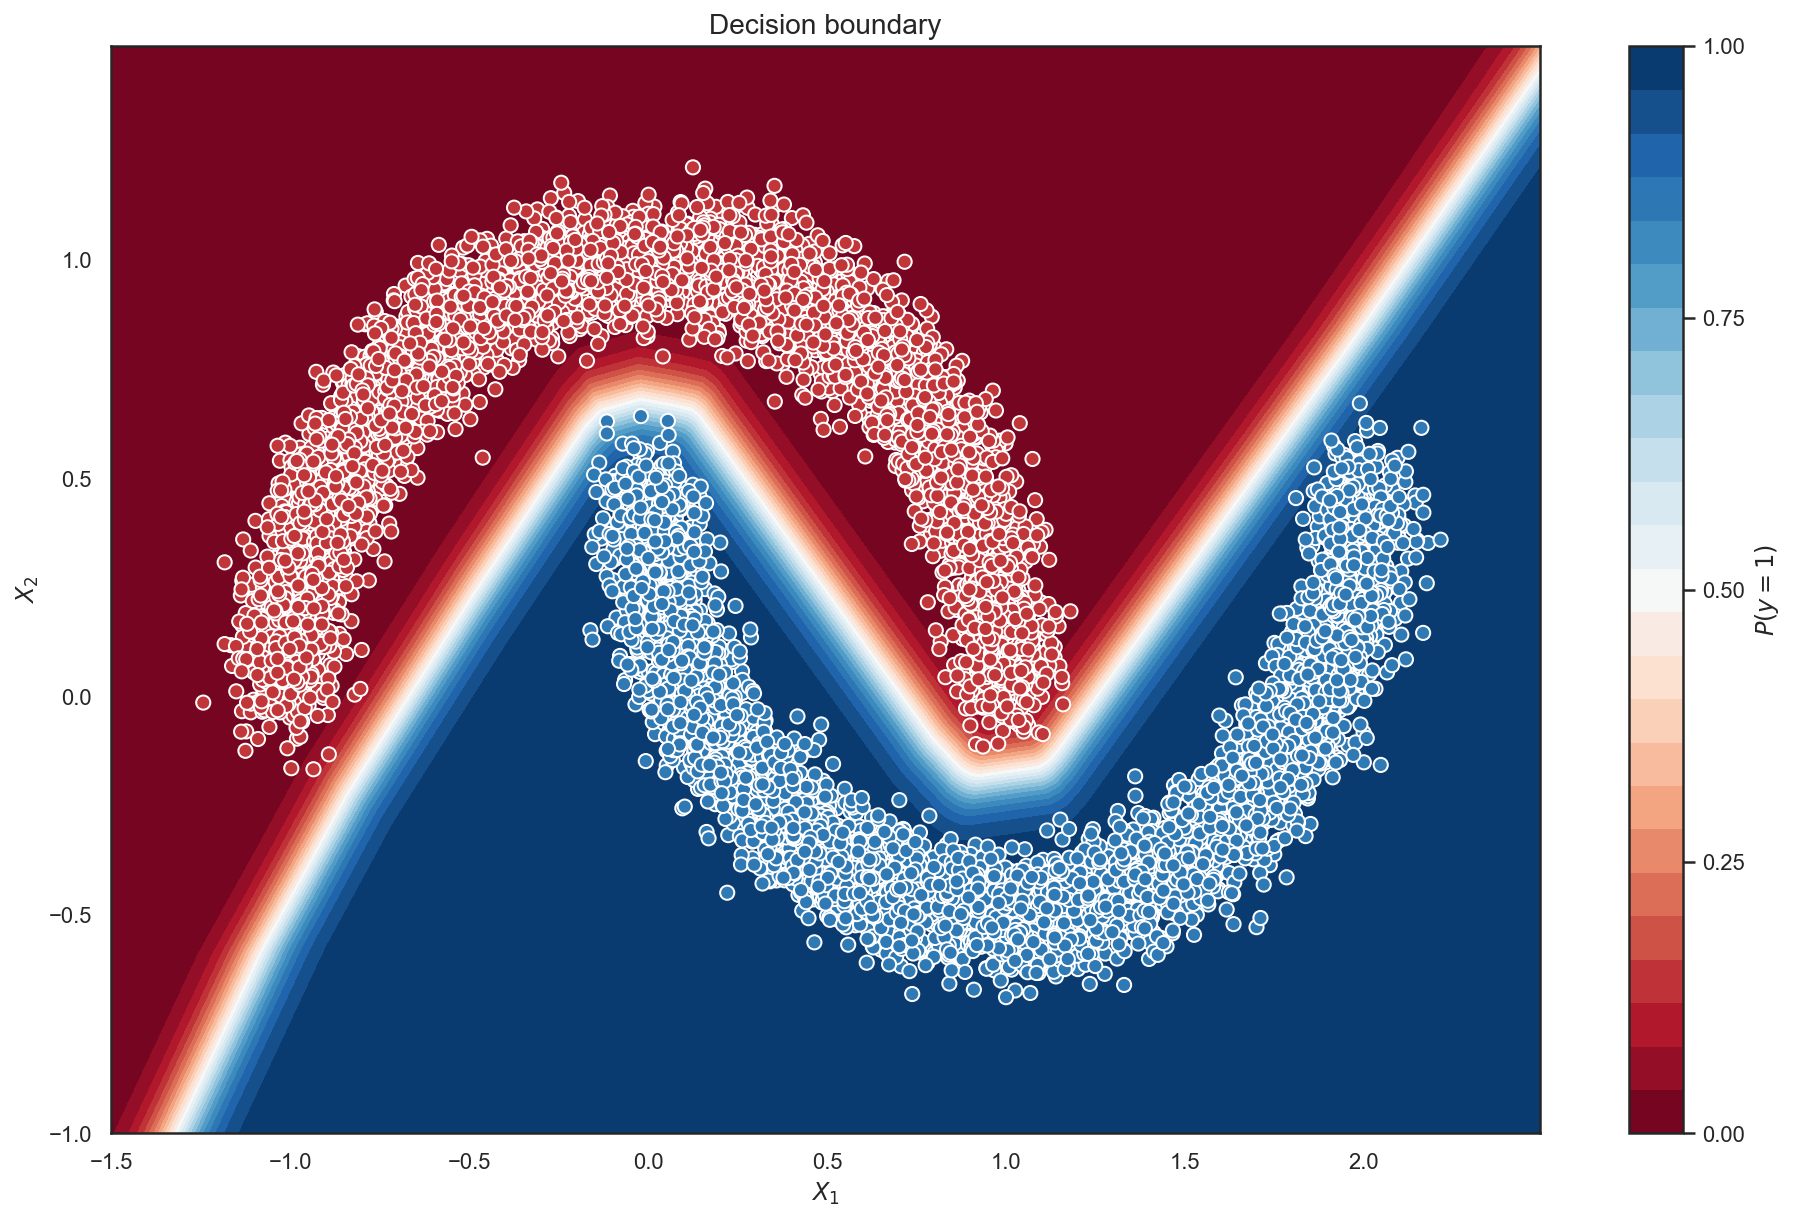

In [10]:
import numpy as np

sns.set(style="white")

xx, yy = np.mgrid[-1.5:2.5:.01, -1.:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
batch = torch.from_numpy(grid).type(torch.float32)
with torch.no_grad():
    probs = torch.sigmoid(model(batch).reshape(xx.shape))
    probs = probs.numpy().reshape(xx.shape)

f, ax = plt.subplots(figsize=(16, 10))
ax.set_title("Decision boundary", fontsize=14)
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(xlabel="$X_1$", ylabel="$X_2$")
plt.show()